In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('paper')
import pandas as pd
from random import randint, seed, uniform
import numpy as np
import swarms

In [2]:
GPI = pd.read_csv("../fullGPIsample.csv", index_col=0)
GPI = GPI[~GPI['Distance_distance'].isnull()]
GPI = GPI.reset_index(drop=True)
GPI['Age'] = 0
GPI.tail()

,S_Type,Distance_distance,FLUX_I,FLUX_H,Fe_H_Teff,Class,subtype,Mbol,Lum,Teff,Mass,Age
594,B9V,48.5835,NaN,4.622,10860,B,9,0.570,46.558609,10850.0,2.455,0
595,A7III/IV,67.1100,NaN,5.879,7834,A,7,2.445,8.279422,8000.0,1.595,0
596,F6V,35.3895,6.370,5.787,6255,F,6,3.860,2.249055,6400.0,1.160,0
597,K2V,21.9270,7.194,6.007,0,K,2,5.620,0.444631,4930.0,0.738,0
598,A1V,47.0754,NaN,4.949,9057,A,1,1.440,20.892961,9370.0,2.005,0


In [3]:
TWA = pd.read_csv("../twatargets.csv", index_col=0)
TWA = TWA.reset_index(drop=True)
#TWA = TWA.loc[2]
TWA = TWA.loc[[1,4,5,7]]
TWA = TWA.reset_index(drop=True)
del TWA['TWA']
TWA['Age'] = 1.e7
TWA

,ID,RA_2_A_ICRS_J2017_5_2000,DEC_2_D_ICRS_2017_5_2000,S_Type,Distance_distance,FLUX_I,FLUX_H,Fe_H_Teff,Class,subtype,Mass,Lum,Teff,contrast_thresh,Moving Group,SimbadType,In GPI Sample,Age
0,CD-29 8887,11 09 13.6749,-30 01 40.070,M2Ve,46.0806,8.875,6.927,3704,M,2,0.44,0.023,3704,0.000002,TWA,T Tau-type Star,False,10000000.0
1,CD-33 7795,11 31 55.1407,-34 36 27.214,M2Ve,49.3786,9.150,6.987,3650,M,2,0.44,0.023,3650,0.000003,TWA,T Tau-type Star,False,10000000.0
2,V* BX Ant,10 18 28.6211,-31 50 02.826,M0Ve,65.6444,9.325,8.180,0,M,0,0.60,0.072,3800,0.000003,TWA,T Tau-type Star,False,10000000.0
3,CD-34 7390,11 21 17.24,-34 46 45.5,M1Ve+M1Ve,38.0000,9.038,NaN,0,M,1,0.49,0.035,3600,0.000003,TWA,Double or multiple star,False,10000000.0


In [4]:
betapic = pd.read_csv("../betapictargets.csv", index_col=0)
betapic['Age'] = 2.6e7
betapic

,ID,RA_2_A_ICRS_J2017_5_2000,DEC_2_D_ICRS_2017_5_2000,S_Type,Distance_distance,FLUX_I,FLUX_H,Fe_H_Teff,Class,subtype,Mass,Lum,Teff,contrast_thresh,Moving Group,SimbadType,In GPI Sample,Age
0,GJ 3305,04 37 37.5202,-02 29 28.869,M1.1V,26.3412,8.590,6.639,3698,M,1,0.49,0.0350,3698,2.000000e-06,Beta Pic,T Tau-type Star,False,26000000.0
1,HD 155555C,17 17 31.2440,-66 57 05.472,M3Ve,30.3463,NaN,7.916,0,M,3,0.36,0.0150,3250,3.000000e-06,Beta Pic,High proper-motion Star,False,26000000.0
2,V* AU Mic,20 45 09.9167,-31 20 27.241,M1VeBa1,9.7248,6.593,4.831,3742,M,1,0.49,0.0350,3742,3.000000e-07,Beta Pic,Variable of BY Dra type,True,26000000.0
3,V* AO Men,06 18 28.1785,-72 02 41.446,K4Ve,39.2626,8.456,6.984,4260,K,4,0.75,0.2300,4260,2.000000e-06,Beta Pic,Variable of BY Dra type,False,26000000.0
4,V* AZ Cap,20 56 02.8111,-17 10 53.804,K7,36.0000,8.847,7.250,0,K,7,0.63,0.1000,3900,2.000000e-06,Beta Pic,Variable of BY Dra type,False,26000000.0
5,CD-57 1054,05 00 47.2059,-57 15 25.453,M0Ve,26.9008,8.177,6.429,4048,M,0,0.60,0.0720,4048,2.000000e-06,Beta Pic,High proper-motion Star,True,26000000.0
7,CD-64 1208,18 45 37.121,-64 51 46.08,K5Ve,29.2000,NaN,6.318,0,K,5,0.70,0.1900,4434,3.000000e-06,Beta Pic,Double or multiple star,False,26000000.0
8,V* AT Mic,20 41 51.5331,-32 26 06.828,M4.5Ve+M4.5Ve,10.7000,7.383,5.201,3123,M,4,0.20,0.0055,3123,7.000000e-07,Beta Pic,Double or multiple star,False,26000000.0


In [5]:
#targets = pd.concat([TWA, betapic])
#targets = targets.reset_index(drop=True)
#targets = targets.loc[[0,1,2,3,4,6]]
#targets = targets.reset_index(drop=True)
targets = TWA
targets

,ID,RA_2_A_ICRS_J2017_5_2000,DEC_2_D_ICRS_2017_5_2000,S_Type,Distance_distance,FLUX_I,FLUX_H,Fe_H_Teff,Class,subtype,Mass,Lum,Teff,contrast_thresh,Moving Group,SimbadType,In GPI Sample,Age
0,CD-29 8887,11 09 13.6749,-30 01 40.070,M2Ve,46.0806,8.875,6.927,3704,M,2,0.44,0.023,3704,0.000002,TWA,T Tau-type Star,False,10000000.0
1,CD-33 7795,11 31 55.1407,-34 36 27.214,M2Ve,49.3786,9.150,6.987,3650,M,2,0.44,0.023,3650,0.000003,TWA,T Tau-type Star,False,10000000.0
2,V* BX Ant,10 18 28.6211,-31 50 02.826,M0Ve,65.6444,9.325,8.180,0,M,0,0.60,0.072,3800,0.000003,TWA,T Tau-type Star,False,10000000.0
3,CD-34 7390,11 21 17.24,-34 46 45.5,M1Ve+M1Ve,38.0000,9.038,NaN,0,M,1,0.49,0.035,3600,0.000003,TWA,Double or multiple star,False,10000000.0


In [6]:
BX Ant V 11.45, I 9.3, J 8.7, H 8.2, K 8.0
CD-33 7795 V 11.5, I 9.15, J 7.7, H 7.0, K 6.7
CD-29 8887 V 11.1, I 8.9, J 7.6, H 6.9, K 6.7
CD-34 7390 V 11.1, I 9.038, J 8.43 from literature/simbad. Interpolated Y 8.7 H 7.7 K 7.4

SyntaxError: invalid syntax (<ipython-input-6-d1cacebc980c>, line 1)

TWA 13 > 4" apart https://www.aanda.org/articles/aa/pdf/2014/03/aa22075-13.pdf table 3
Hen 3-600 1.5" apart https://arxiv.org/pdf/0912.3537.pdf Fig 1

https://iopscience.iop.org/article/10.3847/0004-6256/152/1/3/pdf for TWA 13 J band mag

https://academic.oup.com/mnras/article/469/1/579/3103050 HD 155555C. Hint of IR excess

In [7]:
contrast = np.loadtxt("GPITWA7contrastcurve.txt")
contrastsep = contrast[0,:]
contrast = contrast[1,:]

In [8]:
Mmoon = 7.35e22
Mjup = 1.898e27
Rjup = 7.1492e7
AU = 1.496e11
Mearth = 5.972e24
pc = 3.086e16
Msun = 1.989e30
Lsun = 3.828e26

# Drawing Planets

Clanton 16 has outer cutoff at 10 AU, with huge positive error bar (+75 or something). Not constrained at all at GPI distances. ALMA (Zhang 18) say semimajor axis distribution consistent with flat in log a (this is actually consistent with Clanton 16. Their best fit said that planet occurrence increased with distance (with outer cutoff at 10 AU), but Fig 14 corner plot shows that at 1 sigma, beta can be 0 (flat in log a) if the outer cutoff is at large distances (what ALMA finds)).

So, model as flat in log a, following Clanton 16 mass distribution. We also want to match the overall occurrence. We can put this in by hand. Set to 0.5 (Zhang 18) between Nep and 13 Mjup. In this case, using their power law, you get about 1% occurrence > 3 M_J, consistent with direct imaging surveys.

In [9]:
Mmin = 15 # Mearth (Nep)
Mmax = 13*318 # Mearth (Jup)
nvals = 1000
# Draw mass from Nep to 13 Mjup according to m^-0.86 Clanton 16
# ignore normalization which goes into occurrence. We assume we draw a planet, just 
# want relative fractions correct
totoccurrence = 0.5
Npts = 1000
alpha = -0.86
ms = np.linspace(Mmin, Mmax, Npts)
pdf = ms**(alpha-1) # dN/dlogM = dN/dM * m, so dN/dM \propto m^(alpha-1)
cumpdf = np.cumsum(pdf)/pdf.sum() * totoccurrence
randv = np.random.uniform(size=nvals)
idxs = np.searchsorted(cumpdf, randv)
masses = ms[[idx for idx in idxs if idx < len(cumpdf)]]

By multiplying the cum pdf by the total occurrence we want, we get the bottom. Now we draw from this distribution by picking a value on the y axis. If we pick a number greater than the occurrence rate, here 0.5, and end up above the line, we miss, and the system has no planet. If we draw a number below, we hit the curve, and we find the corresponding x value as our planetary mass. Last line in cell above deals with all the curve misses in searchsorted, which when that happens returns len(cumpdf) for the index).

Text(0,0.5,'Cumulative PDF')

/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


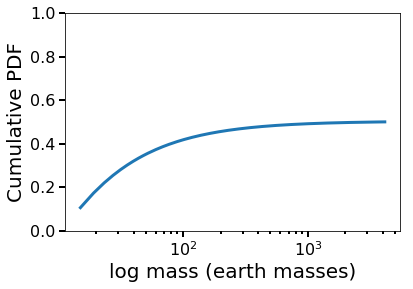

In [10]:
fig, ax = plt.subplots()
ax.plot(ms, cumpdf)
ax.set_ylim([0,1])
ax.set_xscale('log')
ax.set_xlabel('log mass (earth masses)')
ax.set_ylabel('Cumulative PDF')

We drew nvals samples, so calculate the fraction between Nep and 3 MJ

In [11]:
((masses < 900) & (masses > 14.9)).sum()/nvals

0.467

Fraction > 3 M_J, should be 1% to be consistent with direct imaging

In [12]:
(masses > 900).sum()/nvals

0.011

In log log plot, bins are logarithmic, so delta log M = const = B. Then N = Am^alpha * B, so log N = alpha*m + const = line

/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


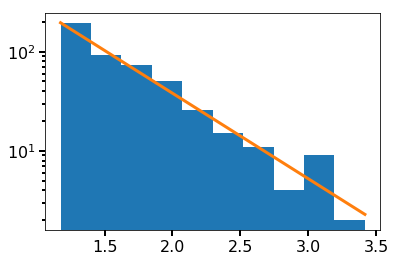

In [13]:
fig, ax = plt.subplots()
hist, edges, patches = ax.hist(np.log10(masses))
ax.plot(edges, 10**(np.log10(hist[0])+(edges-edges[0])*(alpha)))
ax.set_yscale('log')

In linear plot with linear bins, N = Am^(alpha-1) * B, but can't take log of both sides since we said we made a plot with linear bins. N_i = N_0*(m_i/m_0)^(alpha-1)

/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


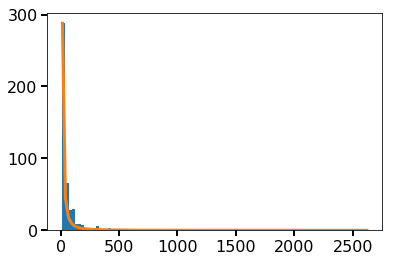

In [14]:
fig, ax = plt.subplots()
hist, edges, patches = ax.hist(masses, bins=100)
ax.plot(edges, hist[0]*(edges/edges[0])**(alpha-1))

In [15]:
seed(0)

def loguniform(minval, maxval):
    return 10**uniform(np.log10(minval), np.log10(maxval))

def draw_star(GPI):
    if isinstance(GPI, pd.Series):
        star = GPI
    else:
        idx = randint(0, GPI.shape[0]-1)
        star = GPI.loc[idx]
    return star['Mass']*Msun, star['Lum']*Lsun, star['Fe_H_Teff'], star['Distance_distance']*pc, star['FLUX_I'], star['Age']

def draw_planet():
    Mmin = 15 # Mearth (Nep)
    Mmax = 13*318 # Mearth (Jup)
    # Draw mass from Nep to 13 Mjup according to m^-0.86 Clanton 16
    totoccurrence = 0.5
    Npts = 1000
    alpha = -0.86
    ms = np.linspace(Mmin, Mmax, Npts)
    pdf = ms**(alpha-1) # dN/dlogM = dN/dM * m, so dN/dM \propto m^(alpha-1)
    cumpdf = np.cumsum(pdf)/pdf.sum() * totoccurrence
    randv = np.random.uniform()
    idx = np.searchsorted(cumpdf, randv)
    if idx == len(cumpdf):
        return None, None # didn't draw a planet
    else:
        # draw semimajor axis
        amin = 10# AU
        amax = 200 # AU
        a = loguniform(amin, amax)
        return a*AU, ms[idx]*Mearth 

def contrast_scat(A, g, Q, a_pl):
    return (A*g*Q) / (np.pi*a_pl**2)

In [16]:
def sample(GPI):
    Mstar, Lstar, Tstar, d_pl, Imag, age = draw_star(GPI)
    apl, Mplt = draw_planet()
    if apl == None:
        return None, None, None, None, None
    
    if age == 0:
        age = loguniform(1e7, 1e8)
    Dc = loguniform(1e5, 1e6) # m
    Mtot = loguniform(0.2, 2)*Mearth#loguniform(1e-4, 1)*Mearth
    rho = 1000 # kg/m^3
    eta = 0.5 # eta
    Q = loguniform(0.05, 0.5) # Q_bd = [0, 0.8]
    g = loguniform(0.2, 0.8) # 0.32 https://arxiv.org/pdf/1709.00417.pdf
    Dt = loguniform(10, 1000)
    Nstr = 6
    Dmax = Dc
    fQ = loguniform(1,10)
    f_vrel = 4/np.pi
    alpha= 1.2
    
    swarm = swarms.CollSwarm(Mtot, Dt, Dmax, Lstar, Mstar, Mplt, apl, R_pl=None, eta=eta, Nstr=Nstr, d_pl=d_pl,
                            rho=rho, fQ=fQ, f_vrel=f_vrel, correction=True, alpha=alpha, Dmin_min=1.25)

    swarm.updateSwarm(age)
    swarm_contrast = contrast_scat(swarm.computeAtot(), g, Q, apl)
            
    return swarm_contrast, apl/AU, d_pl/pc, Imag, Mplt

In [17]:
%%time
seed(0)
Nsamples = 600
CR, a, d, Imag, Mplt = np.zeros(Nsamples), np.zeros(Nsamples), np.zeros(Nsamples), np.zeros(Nsamples), np.zeros(Nsamples)
for i in range(Nsamples):
    CR[i], a[i], d[i], Imag[i], Mplt[i] = sample(GPI)

CPU times: user 290 ms, sys: 3.32 ms, total: 294 ms
Wall time: 292 ms


In [18]:
CR2, a2, d2, Imag2, Mplt2 = np.zeros(Nsamples), np.zeros(Nsamples), np.zeros(Nsamples), np.zeros(Nsamples), np.zeros(Nsamples)
for i in range(Nsamples):
    CR2[i], a2[i], d2[i], Imag2[i], Mplt2[i] = sample(targets)

/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  
/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


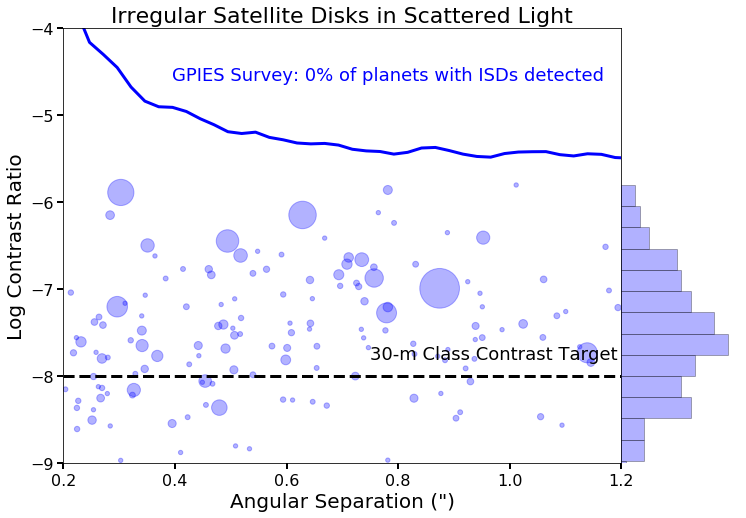

In [20]:
mask = (~np.isnan(CR)) & (a/d > 0.2) & (a/d < 1.2)
mask2 = (~np.isnan(CR2)) & (a2/d2 > 0.2) & (a2/d2 < 1.2)
cm = plt.cm.get_cmap('RdYlBu')

sep = a[mask]/d[mask]
sep2 = a2[mask2]/d2[mask2]
logCR = np.log10(CR[mask])
logCR2 = np.log10(CR2[mask2])
Mpltcut = Mplt[mask]
Mplt2cut = Mplt2[mask2]

idxs = np.searchsorted(contrastsep, sep2)
detectable2 = np.log10(np.array(contrast/5)[idxs]) < logCR2

fig, axarr = plt.subplots(figsize=(12,8), ncols=2, gridspec_kw = {'width_ratios':[5, 1]}, sharey=True)
#axarr[0].scatter(sep2[detectable2], logCR2[detectable2], c='r', s=400*Mplt2cut/Mearth/318)
#axarr[0].scatter(sep2[~detectable2], logCR2[~detectable2], c='r', s=400*Mplt2cut/Mearth/318, alpha=0.3)
axarr[0].scatter(sep, logCR, c='b', s=400*Mpltcut/Mearth/318, alpha=0.3)

axarr[0].plot(contrastsep, np.log10(contrast), 'b-')
#axarr[0].plot(contrastsep, np.log10(contrast/5), 'r-')
axarr[0].axhline(-8, color='k', linestyle='--')
axarr[0].set_xlim([0.2, 1.2])
axarr[0].set_ylim([-9, -4])
axarr[0].set_xlabel('Angular Separation (")')
axarr[0].set_ylabel('Log Contrast Ratio')
axarr[0].set_title('Irregular Satellite Disks in Scattered Light', fontsize=22)
plt.subplots_adjust(wspace=0)
#axarr[0].text(0.32, -4.3, "Proposed Survey: {0:.0f}% of planets with ISDs detected".format(detectable2.sum()/len(sep2)*100), color='r', fontsize=18)
axarr[0].text(0.395, -4.6, "GPIES Survey: 0% of planets with ISDs detected", color='b', fontsize=18)
axarr[0].text(0.75, -7.8, "30-m Class Contrast Target", color='k', fontsize=18)

axarr[1].set_axis_off()
#vals2, bins2, patches2 = axarr[1].hist(np.log10(CR2[mask2]), orientation='horizontal', bins=20, facecolor='r', ec='k', alpha=0.3)
vals, bins, patches = axarr[1].hist(np.log10(CR[mask]), orientation='horizontal', bins=20, facecolor='b', ec='k', alpha=0.3)
#fig.savefig('GPIproposaldetections.pdf', bbox_inches='tight')

In [68]:
(a2[mask2]/d2[mask2])[:10]

array([0.89067309, 0.97263175, 0.78285546, 0.88511144, 0.99764827,
       0.52315605, 0.3896339 , 0.80115482, 0.94685301, 0.57214089])

In [124]:
detectable2 = np.array(contrast)[idxs] < CR2[mask2]

array([False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [126]:
contrastsep = [0.1477905,
0.172581, 
0.1973715,
0.222162, 
0.2469525,
0.271743, 
0.2965335,
0.321324, 
0.3461145,
0.370905, 
0.3956955,
0.420486, 
0.4452765,
0.470067, 
0.4948575,
0.519648, 
0.5444385,
0.569229, 
0.5940195,
0.61881,
0.6436005,
0.668391, 
0.6931815,
0.717972, 
0.7427625,
0.767553, 
0.7923435,
0.817134, 
0.8419245,
0.866715, 
0.8915055,
0.916296, 
0.9410865,
0.965877, 
0.9906675,
1.015458, 
1.0402485,
1.065039, 
1.0898295,
1.11462,
1.1394105,
1.164201, 
1.1889915,
1.213782, 
1.2385725,
1.263363, 
1.2881535]

In [127]:
contrast = [0.000430448548386,
0.000266539559762 ,
 0.000287939399635,
0.000168459076148 ,
 6.91689461404e-05,
5.0147846963e-05,
 3.55251696993e-05,
2.11869226293e-05 ,
 1.45887291952e-05,
1.2570219319e-05,
 1.23722126067e-05,
1.10908261411e-05, 
 9.15730510477e-06,
7.8118933348e-06,
 6.49424872405e-06,
6.19151571096e-06, 
 6.41601938518e-06,
5.5870127271e-06,
 5.24081320874e-06,
4.81653151533e-06,
 4.70585631515e-06,
4.76186787104e-06, 
 4.55812394541e-06,
4.08007592215e-06, 
 3.90741199186e-06,
3.84428372417e-06, 
 3.58789893621e-06,
3.76187681299e-06, 
 4.21695404622e-06,
4.28152737923e-06 ,
 3.94345786914e-06,
3.58632191792e-06 ,
 3.3725670154e-06 ,
3.311488877e-06,
 3.64268663977e-06,
3.78992952213e-06 ,
 3.82335062161e-06,
3.83196990365e-06 ,
 3.53653739032e-06,
3.4174954882e-06,
 3.62095055013e-06,
3.56677234525e-06 ,
 3.27773632444e-06,
3.2206267027e-06,
 3.36098341514e-06,
3.50319639309e-06 ,
 3.62442293214e-06]

In [128]:
cont = np.zeros((2, len(contrast)))
cont[0:] = contrastsep
cont[1:] = contrast
cont

array([[1.47790500e-01, 1.72581000e-01, 1.97371500e-01, 2.22162000e-01,
        2.46952500e-01, 2.71743000e-01, 2.96533500e-01, 3.21324000e-01,
        3.46114500e-01, 3.70905000e-01, 3.95695500e-01, 4.20486000e-01,
        4.45276500e-01, 4.70067000e-01, 4.94857500e-01, 5.19648000e-01,
        5.44438500e-01, 5.69229000e-01, 5.94019500e-01, 6.18810000e-01,
        6.43600500e-01, 6.68391000e-01, 6.93181500e-01, 7.17972000e-01,
        7.42762500e-01, 7.67553000e-01, 7.92343500e-01, 8.17134000e-01,
        8.41924500e-01, 8.66715000e-01, 8.91505500e-01, 9.16296000e-01,
        9.41086500e-01, 9.65877000e-01, 9.90667500e-01, 1.01545800e+00,
        1.04024850e+00, 1.06503900e+00, 1.08982950e+00, 1.11462000e+00,
        1.13941050e+00, 1.16420100e+00, 1.18899150e+00, 1.21378200e+00,
        1.23857250e+00, 1.26336300e+00, 1.28815350e+00],
       [4.30448548e-04, 2.66539560e-04, 2.87939400e-04, 1.68459076e-04,
        6.91689461e-05, 5.01478470e-05, 3.55251697e-05, 2.11869226e-05,
       

In [129]:
np.savetxt("GPITWA7contrastcurve.txt", cont)

(1e-07, 0.1)

/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


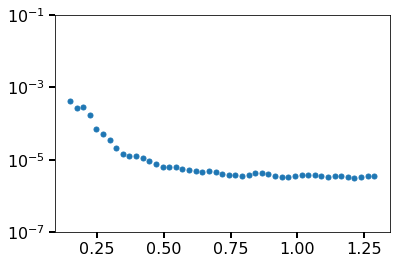

In [102]:
fig, ax = plt.subplots()
ax.plot(sep, contrast, '.')
ax.set_yscale('log')
ax.set_ylim([1e-7, 1e-1])

In [ ]:
0.1477905 0.000430448548386 0.000291613794733
0.172581 0.000266539559762 0.000187492285477
0.1973715 0.000287939399635 0.000198618623155
0.222162 0.000168459076148 0.000120011320614
0.2469525 6.91689461404e-05 4.87715388477e-05
0.271743 5.0147846963e-05 3.67599134355e-05
0.2965335 3.55251696993e-05 2.6480738681e-05
0.321324 2.11869226293e-05 1.55977395772e-05
0.3461145 1.45887291952e-05 1.10603714299e-05
0.370905 1.2570219319e-05 9.5493317982e-06
0.3956955 1.23722126067e-05 9.63986619598e-06
0.420486 1.10908261411e-05 8.64085526464e-06
0.4452765 9.15730510477e-06 7.17465529833e-06
0.470067 7.8118933348e-06 6.13270407134e-06
0.4948575 6.49424872405e-06 5.2686880959e-06
0.519648 6.19151571096e-06 5.30333485914e-06
0.5444385 6.41601938518e-06 5.42441936573e-06
0.569229 5.5870127271e-06 4.6802326901e-06
0.5940195 5.24081320874e-06 4.21874151542e-06
0.61881 4.81653151533e-06 3.88259582148e-06
0.6436005 4.70585631515e-06 3.83070050302e-06
0.668391 4.76186787104e-06 3.73104381763e-06
0.6931815 4.55812394541e-06 3.5374707736e-06
0.717972 4.08007592215e-06 3.28715448974e-06
0.7427625 3.90741199186e-06 3.11468417065e-06
0.767553 3.84428372417e-06 3.00557471364e-06
0.7923435 3.58789893621e-06 2.74586097498e-06
0.817134 3.76187681299e-06 2.76738852624e-06
0.8419245 4.21695404622e-06 2.99227439539e-06
0.866715 4.28152737923e-06 3.03941101401e-06
0.8915055 3.94345786914e-06 2.87333824003e-06
0.916296 3.58632191792e-06 2.60306350067e-06
0.9410865 3.3725670154e-06 2.51273121124e-06
0.965877 3.311488877e-06 2.55897267848e-06
0.9906675 3.64268663977e-06 2.85643765959e-06
1.015458 3.78992952213e-06 2.94423652771e-06
1.0402485 3.82335062161e-06 2.92987718193e-06
1.065039 3.83196990365e-06 2.93689091807e-06
1.0898295 3.53653739032e-06 2.68045253175e-06
1.11462 3.4174954882e-06 2.56944221909e-06
1.1394105 3.62095055013e-06 2.68925518738e-06
1.164201 3.56677234525e-06 2.54858468706e-06
1.1889915 3.27773632444e-06 2.25225394464e-06
1.213782 3.2206267027e-06 2.08381826689e-06
1.2385725 3.36098341514e-06 2.07991095385e-06
1.263363 3.50319639309e-06 2.20381173366e-06
1.2881535 3.62442293214e-06 2.33533551416e-06


In [50]:
vals2

array([ 1.,  2.,  3.,  5.,  8.,  7.,  6., 17.,  8., 14., 15., 23., 34.,
       26., 22., 25., 22., 11., 11.,  3.])

In [51]:
bins2

array([-9.40020557, -9.17483213, -8.94945869, -8.72408525, -8.49871181,
       -8.27333837, -8.04796493, -7.82259149, -7.59721805, -7.37184461,
       -7.14647117, -6.92109773, -6.69572429, -6.47035085, -6.2449774 ,
       -6.01960396, -5.79423052, -5.56885708, -5.34348364, -5.1181102 ,
       -4.89273676])

In [52]:
vals2[bins2[:-1] > -6.1]

array([25., 22., 11., 11.,  3.])

Text(0.5,1,'Log Semimajor Axis (AU)')

/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


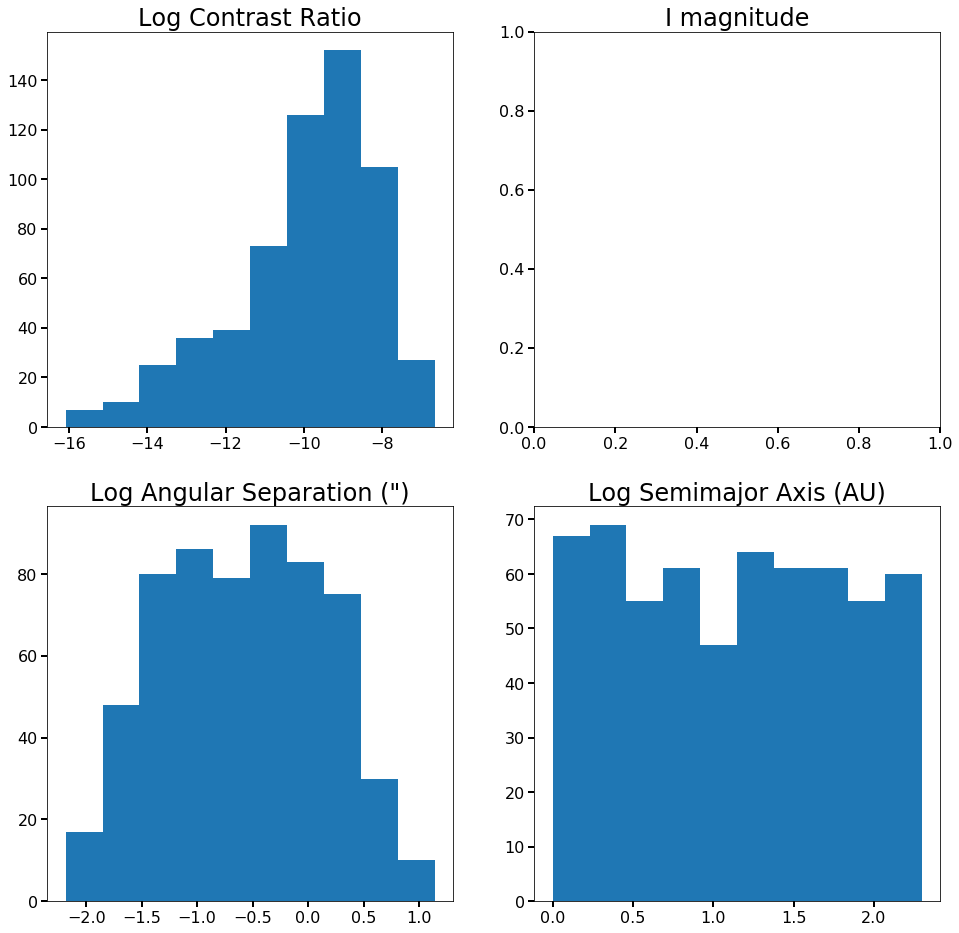

In [54]:
fig, axarr = plt.subplots(nrows=2, ncols=2, figsize=(16,16))
axarr[0,0].hist(np.log10(CR))
axarr[1,0].hist(np.log10(a/d))
axarr[1,1].hist(np.log10(a))

axarr[0,0].set_title('Log Contrast Ratio')
axarr[0,1].set_title('I magnitude')
axarr[1,0].set_title('Log Angular Separation (")')
axarr[1,1].set_title('Log Semimajor Axis (AU)')

Text(0.5,1,'Pessimistic')

/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


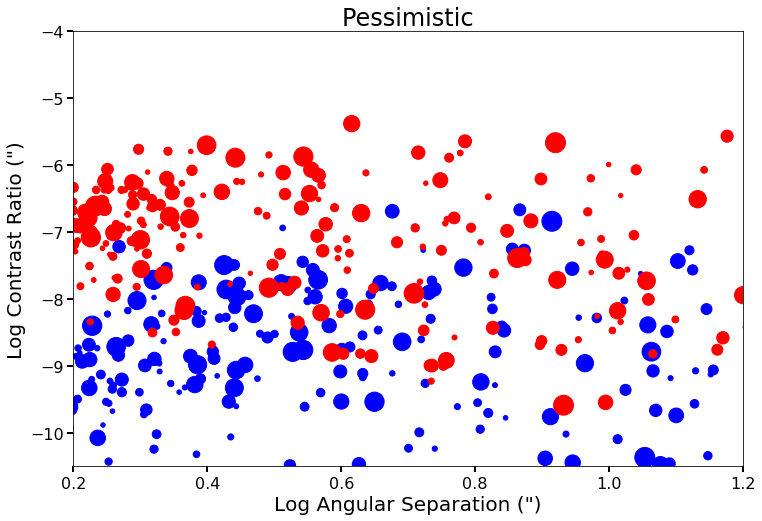

In [103]:
#CR[i], a[i], d[i], Imag[i]
cm = plt.cm.get_cmap('RdYlBu')
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(a/d, np.log10(CR), c='b', s=400*Mplt/Mearth/318)
ax.scatter(a2/d2, np.log10(CR2), c='r', s=400*Mplt2/Mearth/318)
ax.set_xlim([0.2, 1.2])
ax.set_ylim([-10.5, -4])
ax.set_xlabel('Log Angular Separation (")')
ax.set_ylabel('Log Contrast Ratio (")')
ax.set_title('Pessimistic')
#print("{0:.1f}% detectable".format(mask.sum()/Nsamples*100))

In [60]:
%%time
seed(0)
Nsamples = 10000
CR, a, d, Imag, Mplt = np.zeros(Nsamples), np.zeros(Nsamples), np.zeros(Nsamples), np.zeros(Nsamples), np.zeros(Nsamples)
for i in range(Nsamples):
    CR[i], a[i], d[i], Imag[i], Mplt[i] = sample(GPI)

TypeError: sample() missing 1 required positional argument: 't'

/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


ValueError: supplied range of [-inf, -inf] is not finite

/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


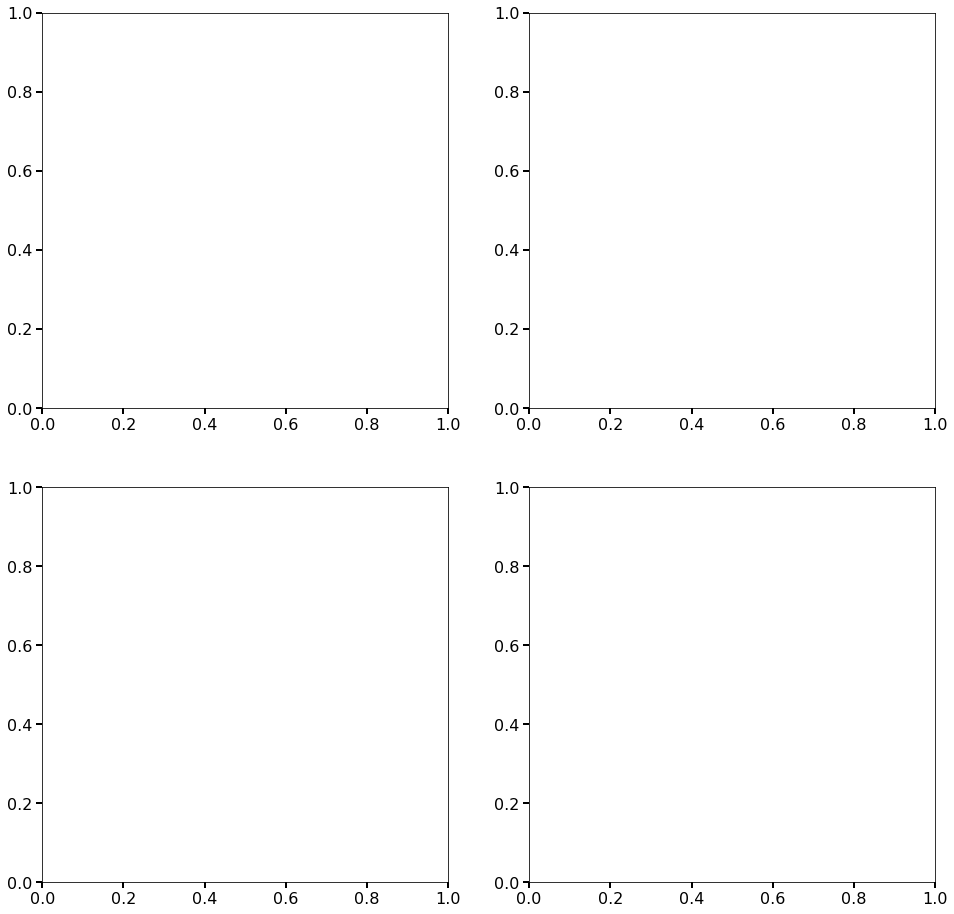

In [61]:
fig, axarr = plt.subplots(nrows=2, ncols=2, figsize=(16,16))
axarr[0,0].hist(np.log10(CR))
axarr[0,1].hist(Imag)
axarr[1,0].hist(np.log10(a/d))
axarr[1,1].hist(np.log10(a))

axarr[0,0].set_title('Log Contrast Ratio')
axarr[0,1].set_title('I magnitude')
axarr[1,0].set_title('Log Angular Separation (")')
axarr[1,1].set_title('Log Semimajor Axis (AU)')

CPU times: user 52.9 ms, sys: 1.22 ms, total: 54.1 ms
Wall time: 53.1 ms


53.0% detectable
CPU times: user 98.2 ms, sys: 2.11 ms, total: 100 ms
Wall time: 98.6 ms


/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


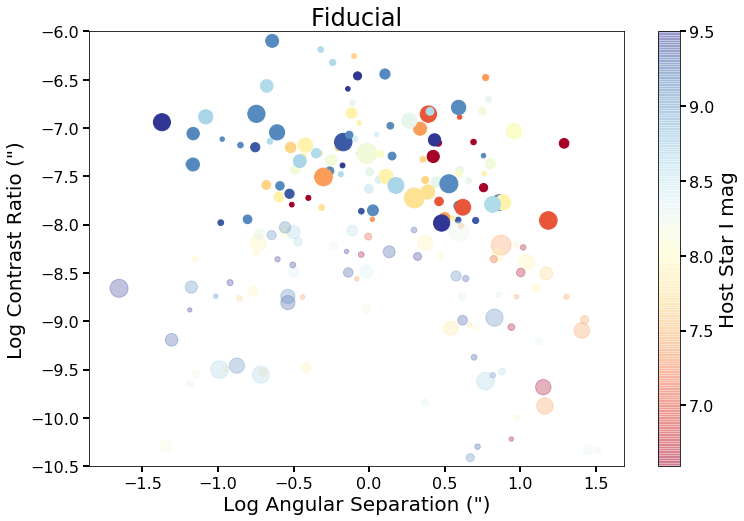

In [256]:
%%time
seed(0)
Nsamples = 200
CR, a, d, Imag, Mplt = np.zeros(Nsamples), np.zeros(Nsamples), np.zeros(Nsamples), np.zeros(Nsamples), np.zeros(Nsamples)
for i in range(Nsamples):
    CR[i], a[i], d[i], Imag[i], Mplt[i] = sample(GPI)
    
mask = CR > 1.e-8
cm = plt.cm.get_cmap('RdYlBu')
fig, ax = plt.subplots(figsize=(12,8))
cb = ax.scatter(np.log10(a/d)[mask], np.log10(CR)[mask], c=Imag[mask], cmap=cm, s=400*Mplt/Mearth/318)
cb = ax.scatter(np.log10(a/d)[~mask], np.log10(CR)[~mask], alpha=0.3, c=Imag[~mask], cmap=cm, s=400*Mplt/Mearth/318)
plt.colorbar(cb, label='Host Star I mag')
#ax.set_xlim([-1, 1])
ax.set_ylim([-10.5, -6])
ax.set_xlabel('Log Angular Separation (")')
ax.set_ylabel('Log Contrast Ratio (")')
ax.set_title('Fiducial')
print("{0:.1f}% detectable".format(mask.sum()/Nsamples*100))

In [4]:
def compute_CR(fsig, fapl, fg, fQ, fMplt, fMstar, cap=False):
    if cap:
        fMplt = fMplt * Mjup
        fMstar = fMstar * Msun
        RH = fapl * (fMplt / (3*fMstar)) ** (1./3.)
        RH = RH * AU / (pi * Rjup)
        AH = pi * RH**2
        print("Hill Area = {0:.3e}".format(AH))
        fsig = array([a if a <= AH else AH for a in fsig])
    return (2.20e-8 * fsig * (fg/0.31) * (fQ/0.1)) / (pi * (fapl/pi)**2)

In [5]:
def compute_SIG(fMtot, frho, fdc, fdmin):
    return fMtot * pi / (6.9e-8 * frho * fdc**0.9 * fdmin**0.7)

In [6]:
def compute_DMIN(fMstar, frho, feta, fMplt):
    return max(2.07e4 * 1e-6 * (fMstar)**(10./3.) * frho**(-1) * (feta/0.5)**(1./2.) * (fMplt)**(-1./3.), 1.65e-6)

In [120]:
from swarms import SizeDistribution, CollSwarm

sd = SizeDistribution(Dmin = 1.e-5, Dmax=1.e5, sigma0=1.6e13)

In [114]:
print("Mtot = {0:.2e}".format(sd.Mtot()))

Mtot = 7.88e+15


In [121]:
sd.Dmax

100000.0

In [126]:
cs = CollSwarm(M0=sd.Mtot(), Dt=100., Dmax=sd.Dmax, L_s = Lsun, M_s=Msun, M_pl=95*Mearth, a_pl=9.5*AU, R_pl=None, eta=0.5, Nstr=6, d_pl=20*pc)

In [127]:
cs.computeRCC()

3.2283317667841965e-13